In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("C:/fili/jupyter_proyectos/samsung.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2850 non-null   object
 1   Close   2850 non-null   int64 
 2   Volume  2850 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.9+ KB


,Close,Volume
count,2850.000000,2.850000e+03
mean,26611.305263,1.610505e+07
std,11991.608543,8.661794e+06
min,8040.000000,0.000000e+00
25%,16300.000000,1.021426e+07
50%,25600.000000,1.359033e+07
75%,30850.000000,1.960970e+07
max,57220.000000,6.487345e+07


In [3]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [4]:
X = df[["Close", "Volume"]]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


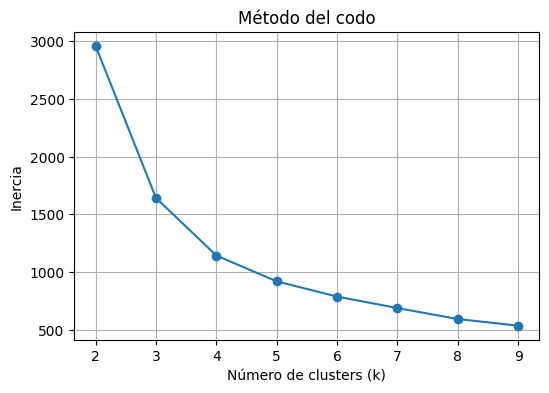

In [6]:
inertias = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.grid(True)
plt.show()


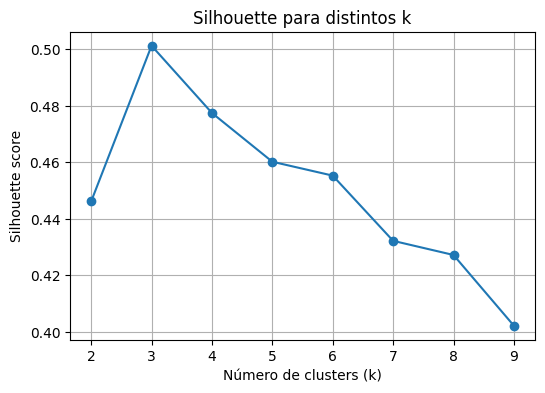

In [7]:
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette para distintos k")
plt.grid(True)
plt.show()


In [8]:
k_optimo = 3  # o el que tú elijas tras ver las gráficas
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df["cluster"] = labels
df.head()


,Date,Close,Volume,cluster
0,2008-01-02,10880,18047200,0
1,2008-01-03,10920,19346500,2
2,2008-01-04,10780,17997350,0
3,2008-01-07,10380,39787200,2
4,2008-01-08,10320,24783700,2


In [9]:
df.groupby("cluster")[["Close", "Volume"]].mean()


,Close,Volume
cluster,,
0,23695.510332,1.278258e+07
1,45833.344051,1.164983e+07
2,15043.026941,2.890558e+07


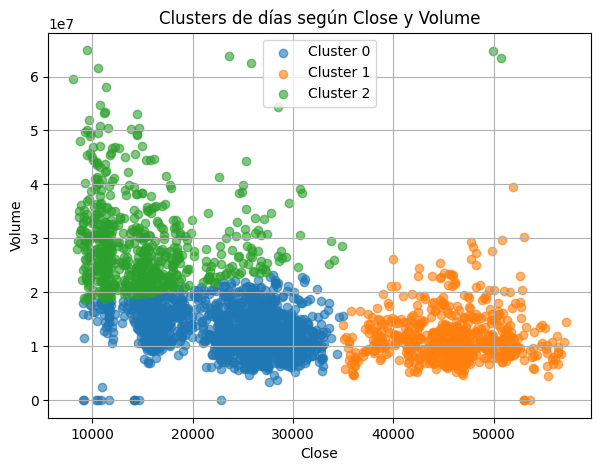

In [10]:
plt.figure(figsize=(7,5))
for c in range(k_optimo):
    subset = df[df["cluster"] == c]
    plt.scatter(subset["Close"], subset["Volume"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("Close")
plt.ylabel("Volume")
plt.title("Clusters de días según Close y Volume")
plt.legend()
plt.grid(True)
plt.show()


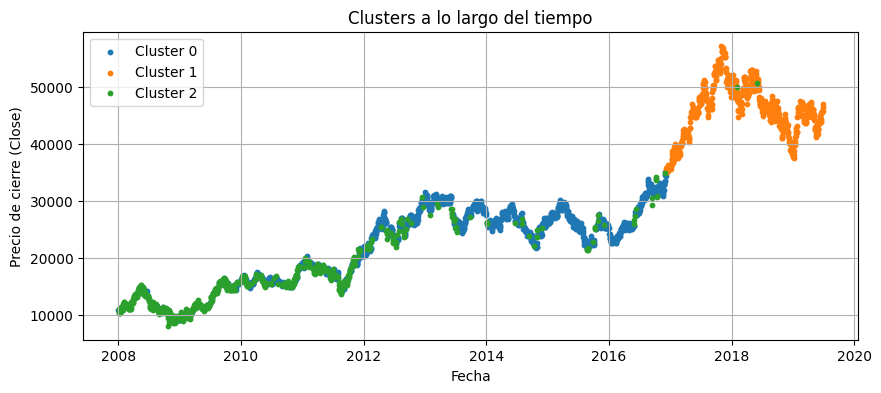

In [11]:
plt.figure(figsize=(10,4))
for c in range(k_optimo):
    subset = df[df["cluster"] == c]
    plt.scatter(subset["Date"], subset["Close"], label=f"Cluster {c}", s=10)

plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (Close)")
plt.title("Clusters a lo largo del tiempo")
plt.legend()
plt.grid(True)
plt.show()
